In [28]:
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.feature_selection import SelectKBest
from collections import Counter
from sklearn.metrics import make_scorer, precision_score, recall_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,cohen_kappa_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, r2_score

# Załadowanie zbioru treningowego (train_a.emd)

In [38]:
data = pd.read_csv('train_a.emd', sep='\t', header=None)
data[0] = data[0].str[1:]
data

,0,1,2,3,4,5,6,7,8,9,...,12279,12280,12281,12282,12283,12284,12285,12286,12287,12288
0,1,0,0,0,0,0,0,0,0,0,...,-121,-123,-128,-125,-123,-126,-123,-126,-126,-130
1,1,0,0,0,0,0,0,0,0,0,...,-338,-342,-339,-338,-339,-339,-342,-342,-340,-339
2,1,0,0,0,0,0,0,0,0,0,...,100,103,106,101,100,97,97,99,100,100
3,1,0,0,0,0,0,0,0,0,0,...,-96,-95,-92,-91,-90,-89,-86,-88,-87,-89
4,1,0,0,0,0,0,0,0,0,0,...,-82,-75,-70,-60,-54,-51,-52,-60,-66,-69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
647,48,0,0,0,0,0,0,0,0,0,...,-389,-387,-389,-391,-391,-390,-390,-391,-388,-388
648,48,0,0,0,0,0,0,0,0,0,...,506,505,506,508,507,507,507,507,507,504
649,48,0,0,0,0,0,0,0,0,0,...,-766,-769,-769,-769,-771,-770,-770,-771,-771,-772
650,48,0,0,0,0,0,0,0,0,0,...,-127,-124,-124,-122,-125,-124,-124,-125,-123,-126


# Analiza zawartości zbioru (klasy, atrybuty, statystyki...)

Analiza labels

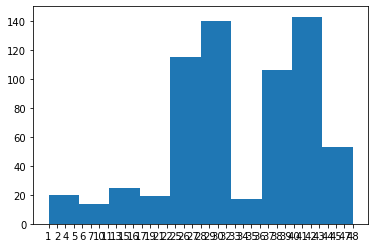

In [39]:
samples = data.values[:,1:]
labels = data.values[:,0]

plt.hist(labels)
plt.show()

Dystybucja labels

In [40]:
print("Labels distribution:",Counter(labels))

Labels distribution: Counter({'25': 105, '37': 74, '40': 52, '32': 50, '41': 45, '42': 38, '29': 36, '28': 33, '38': 23, '44': 23, '30': 21, '13': 15, '45': 12, '48': 12, '39': 9, '43': 8, '4': 7, '35': 7, '15': 6, '21': 6, '47': 6, '1': 5, '22': 5, '26': 5, '27': 5, '36': 5, '2': 4, '5': 4, '7': 4, '10': 4, '11': 4, '16': 4, '17': 4, '19': 4, '33': 3, '6': 2, '34': 2})


# Klasyfikacja różnymi metodami z podziałem na część treningową i walidacyjną (cross validacja? wielokrotny podział?)

Stworzenie modelu dla KNeighborsClassifier

In [41]:
modelKNC = KNeighborsClassifier()
modelKNC.fit(samples, labels)

KNeighborsClassifier()

Testowa szybka klasyfikacja dla KNC

In [42]:
for n in range(10):
    i = random.randrange(len(labels))
    predicted = modelKNC.predict(samples[i].reshape(1,-1))
    print(n," Przewidywano: ",predicted[0], "Jest: ",labels[i], end=' ')
    if(predicted[0]==labels[i]):
        print("Dobrze")
    else:
        print("Źle")

0  Przewidywano:  32 Jest:  32 Dobrze
1  Przewidywano:  44 Jest:  41 Źle
2  Przewidywano:  32 Jest:  32 Dobrze
3  Przewidywano:  44 Jest:  38 Źle
4  Przewidywano:  28 Jest:  36 Źle
5  Przewidywano:  15 Jest:  26 Źle
6  Przewidywano:  41 Jest:  41 Dobrze
7  Przewidywano:  41 Jest:  41 Dobrze
8  Przewidywano:  25 Jest:  42 Źle
9  Przewidywano:  25 Jest:  35 Źle


Stworzenie modelu dla LinearDiscriminantAnalysis

In [43]:
modelLDA = LinearDiscriminantAnalysis()
modelLDA.fit(samples, labels)

LinearDiscriminantAnalysis()

Testowa szybka klasyfikacja dla LDA, komentarz: najczęściej zwraca correct

In [44]:
for n in range(10):
    i = random.randrange(len(labels))
    predicted = modelLDA.predict(samples[i].reshape(1,-1))
    print(n," Przewidywano: ",predicted[0], "Jest: ",labels[i], end=' ')
    if(predicted[0]==labels[i]):
        print("Dobrze")
    else:
        print("Źle")

0  Przewidywano:  22 Jest:  22 Dobrze
1  Przewidywano:  29 Jest:  29 Dobrze
2  Przewidywano:  25 Jest:  25 Dobrze
3  Przewidywano:  29 Jest:  29 Dobrze
4  Przewidywano:  38 Jest:  38 Dobrze
5  Przewidywano:  38 Jest:  38 Dobrze
6  Przewidywano:  28 Jest:  28 Dobrze
7  Przewidywano:  25 Jest:  25 Dobrze
8  Przewidywano:  25 Jest:  25 Dobrze
9  Przewidywano:  25 Jest:  25 Dobrze


Stworzenie modelu dla GaussianNB

In [45]:
modelGNB = GaussianNB()
modelGNB.fit(samples, labels)

GaussianNB()

Testowa szybka klasyfikacja dla GNB

In [46]:
for n in range(10):
    i = random.randrange(len(labels))
    predicted = modelGNB.predict(samples[i].reshape(1,-1))
    print(n," Przewidywano: ",predicted[0], "Jest: ",labels[i], end=' ')
    if(predicted[0]==labels[i]):
        print("Dobrze")
    else:
        print("Źle")

0  Przewidywano:  19 Jest:  19 Dobrze
1  Przewidywano:  41 Jest:  41 Dobrze
2  Przewidywano:  41 Jest:  41 Dobrze
3  Przewidywano:  19 Jest:  19 Dobrze
4  Przewidywano:  44 Jest:  44 Dobrze
5  Przewidywano:  29 Jest:  28 Źle
6  Przewidywano:  32 Jest:  25 Źle
7  Przewidywano:  35 Jest:  35 Dobrze
8  Przewidywano:  40 Jest:  40 Dobrze
9  Przewidywano:  25 Jest:  25 Dobrze


Stworzenie modelu dla DecisionTreeClassifier() ; komentarz: tak jak LinearDiscriminantAnaysis często zwraca Dobrą wartość dla tego typu testu

In [47]:
modelTree = DecisionTreeClassifier()
modelTree.fit(samples, labels)

DecisionTreeClassifier()

Testowa szybka klasyfikacja dla DecisionTree

In [48]:
for n in range(10):
    i = random.randrange(len(labels))
    predicted = modelTree.predict(samples[i].reshape(1,-1))
    print(n," Przewidywano:",predicted[0], "Jest: ",labels[i], end=' ')
    if(predicted[0]==labels[i]):
        print("Dobrze")
    else:
        print("Źle")

0  Przewidywano: 39 Jest:  39 Dobrze
1  Przewidywano: 37 Jest:  37 Dobrze
2  Przewidywano: 37 Jest:  37 Dobrze
3  Przewidywano: 10 Jest:  10 Dobrze
4  Przewidywano: 40 Jest:  40 Dobrze
5  Przewidywano: 42 Jest:  42 Dobrze
6  Przewidywano: 40 Jest:  40 Dobrze
7  Przewidywano: 27 Jest:  27 Dobrze
8  Przewidywano: 40 Jest:  40 Dobrze
9  Przewidywano: 32 Jest:  32 Dobrze


Rozdzielenie Train-Test

In [61]:
(trainSamples, testSamples, trainLabels, testLabels) = sklearn.model_selection.train_test_split(samples, labels, random_state=30
    , stratify=labels
    , train_size=0.75                                                                                            
    )

print("Dystrybucja etykiet treningowych:", Counter(trainLabels))
print("Dystrybucja etykiet testowych:",Counter(testLabels))

modelTrain = LinearDiscriminantAnalysis()
modelTrain.fit(trainSamples, trainLabels) 

modelTrainTree = DecisionTreeClassifier()
modelTrainTree.fit(trainSamples, trainLabels) 

sklearn.model_selection.cross_validate(modelTrain, samples, labels)
sklearn.model_selection.cross_validate(modelTrainTree, samples, labels)

correct = 0;
predictedLabels = modelTrain.predict(testSamples)
for i in range(len(testSamples)):

    if(testLabels[i]==predictedLabels[i]):
        correct = correct + 1
print("Poprawnie LinearDiscriminantAnalysis:",correct," z ",len(testSamples)," accuracy=",correct/len(testSamples))

correctTree = 0;
predictedLabelsTree = modelTrainTree.predict(testSamples)
for i in range(len(testSamples)):

    if(testLabels[i]==predictedLabelsTree[i]):
        correctTree = correctTree + 1
print("Poprawnie DecisionTreeClassifier:",correctTree," z ",len(testSamples)," accuracy=",correctTree/len(testSamples))

Dystrybucja etykiet treningowych: Counter({'25': 79, '37': 56, '40': 39, '32': 38, '41': 34, '42': 28, '29': 27, '28': 25, '38': 17, '44': 17, '30': 16, '13': 11, '48': 9, '45': 9, '39': 7, '43': 6, '4': 5, '35': 5, '15': 5, '27': 4, '1': 4, '36': 4, '26': 4, '22': 4, '47': 4, '21': 4, '16': 3, '7': 3, '2': 3, '10': 3, '5': 3, '19': 3, '11': 3, '17': 3, '33': 2, '6': 1, '34': 1})
Dystrybucja etykiet testowych: Counter({'25': 26, '37': 18, '40': 13, '32': 12, '41': 11, '42': 10, '29': 9, '28': 8, '44': 6, '38': 6, '30': 5, '13': 4, '48': 3, '45': 3, '35': 2, '4': 2, '43': 2, '39': 2, '47': 2, '21': 2, '6': 1, '2': 1, '11': 1, '19': 1, '34': 1, '22': 1, '1': 1, '27': 1, '10': 1, '15': 1, '36': 1, '7': 1, '26': 1, '5': 1, '33': 1, '17': 1, '16': 1})


C:\Users\pawel\anaconda3\envs\deep\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\pawel\anaconda3\envs\deep\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


Poprawnie LinearDiscriminantAnalysis: 121  z  163  accuracy= 0.7423312883435583
Poprawnie DecisionTreeClassifier: 56  z  163  accuracy= 0.34355828220858897


Sprawdzenie błędu dla utworzonego zbioru testowego

In [50]:
correct = 0;
predictedLabels = modelTrain.predict(testSamples)
for i in range(len(testSamples)):
    print(testLabels[i],"->",predictedLabels[i],end=' ')
    if(testLabels[i]==predictedLabels[i]):
        correct = correct + 1; 
        print('OK')
    else:        
        print('BŁĄD')
print("Prawidłowo:",correct," z ",len(testSamples)," accuracy=",correct/len(testSamples))
print("Prawidłowo: {} z {} accuracy = {:.2f}".format(correct,len(testSamples),correct/len(testSamples)))

41 -> 37 BŁĄD
25 -> 25 OK
37 -> 37 OK
6 -> 29 BŁĄD
44 -> 44 OK
2 -> 2 OK
41 -> 37 BŁĄD
11 -> 37 BŁĄD
28 -> 37 BŁĄD
32 -> 32 OK
37 -> 37 OK
25 -> 25 OK
30 -> 37 BŁĄD
19 -> 38 BŁĄD
25 -> 25 OK
25 -> 25 OK
28 -> 28 OK
13 -> 1 BŁĄD
34 -> 29 BŁĄD
13 -> 13 OK
37 -> 37 OK
29 -> 29 OK
22 -> 22 OK
38 -> 38 OK
42 -> 28 BŁĄD
25 -> 25 OK
40 -> 40 OK
1 -> 1 OK
25 -> 25 OK
35 -> 44 BŁĄD
25 -> 25 OK
32 -> 32 OK
32 -> 32 OK
13 -> 13 OK
41 -> 29 BŁĄD
37 -> 37 OK
29 -> 29 OK
28 -> 28 OK
32 -> 25 BŁĄD
40 -> 40 OK
25 -> 25 OK
27 -> 35 BŁĄD
10 -> 27 BŁĄD
37 -> 37 OK
40 -> 40 OK
25 -> 25 OK
41 -> 41 OK
25 -> 35 BŁĄD
41 -> 41 OK
38 -> 28 BŁĄD
37 -> 37 OK
42 -> 42 OK
48 -> 48 OK
4 -> 13 BŁĄD
40 -> 40 OK
38 -> 38 OK
48 -> 48 OK
32 -> 32 OK
43 -> 43 OK
25 -> 25 OK
42 -> 42 OK
29 -> 29 OK
29 -> 29 OK
44 -> 44 OK
42 -> 42 OK
40 -> 40 OK
39 -> 39 OK
32 -> 32 OK
32 -> 25 BŁĄD
25 -> 25 OK
29 -> 29 OK
37 -> 37 OK
44 -> 44 OK
25 -> 25 OK
47 -> 44 BŁĄD
40 -> 39 BŁĄD
45 -> 45 OK
28 -> 28 OK
38 -> 38 OK
15 -> 13 BŁĄD
29 

# Załadowanie zbioru testowego (test_a_labeled.emd)

In [51]:
testData = pd.read_csv('test_a_labeled.emd', sep='\t', header=None)
testData[0] = testData[0].str[1:]
testData

,0,1,2,3,4,5,6,7,8,9,...,12279,12280,12281,12282,12283,12284,12285,12286,12287,12288
0,2,0,0,0,0,0,0,0,0,0,...,93,93,93,93,95,92,89,91,83,86
1,40,0,0,0,0,0,0,0,0,0,...,-149,-153,-153,-153,-153,-155,-152,-153,-152,-156
2,25,0,0,0,0,0,0,0,0,0,...,182,182,181,182,183,183,183,181,183,182
3,25,0,0,0,0,0,0,0,0,0,...,-26,-26,-26,-25,-25,-25,-26,-26,-23,-25
4,32,0,0,0,0,0,0,0,0,0,...,239,234,222,215,210,204,198,192,194,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321,25,0,0,0,0,0,0,0,0,0,...,339,336,336,334,333,335,332,329,328,327
322,25,0,0,0,0,0,0,0,0,0,...,-201,-202,-199,-204,-199,-201,-201,-201,-201,-200
323,37,0,0,0,0,0,0,0,0,0,...,128,129,127,123,121,120,119,116,113,110
324,1,0,0,0,0,0,0,0,0,0,...,156,155,149,149,151,149,147,147,145,140


# Sprawdzenie stworzonego modelu na zbiorze testowym

In [62]:
testSamples = testData.values[:,1:]
testLabels = testData.values[:,0]

modelResults = modelTrain.predict(testSamples)
print(confusion_matrix(testLabels, modelResults))
print(classification_report(testLabels, modelResults))
accuracy = accuracy_score(testLabels, modelResults) 
print("Accuracy: {:.2f}".format(accuracy))
print("Kappa: {:.2f}".format(cohen_kappa_score(testLabels, modelResults)))

[[1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 1]
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
              precision    recall  f1-score   support

           1       0.50      0.33      0.40         3
          10       0.00      0.00      0.00         2
          11       0.00      0.00      0.00         2
          13       0.20      0.25      0.22         8
          15       0.00      0.00      0.00         3
          16       0.00      0.00      0.00         2
          17       0.00      0.00      0.00         2
          19       1.00      0.50      0.67         2
           2       1.00      0.33      0.50         3
          21       0.50      0.25      0.33         4
          22       0.50      0.50      0.50         2
          25       0.91      0.96      0.94        53
          26       1.00      0.67      0.80         3
          27       0.00      0.00      0.00         2
          28       0.62      0.76      0.68        17
          29   

C:\Users\pawel\anaconda3\envs\deep\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
